In [38]:
from pymavlink import mavutil

import matplotlib.pyplot as plt
import pandas as pd
import os
import geopandas as gpd
from shapely.geometry import Point, LineString

In [60]:
vehiculo = 'DA02'

In [61]:
path_rec = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\RECORRIDOS.shp'
gdf_rec = gpd.read_file(path_rec)

In [62]:
if vehiculo == 'DA01':
    path_log = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\TLOGS\ALTA_01'
elif vehiculo == 'DA02':
    path_log = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\TLOGS\ALTA_02'
elif vehiculo == 'DA03':
    path_log = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\TLOGS\ALTA_03'
contenido = os.listdir(path_log)
len(contenido)

239

In [63]:
# Filtrar la lista 'contenido' para excluir elementos que están en la columna 'nombre' del GeoDataFrame
contenido_filtrado = [item for item in contenido if item not in gdf_rec['nombre'].values]
len(contenido_filtrado)

14

In [64]:
def leer_logs(lista_logs):
    list_geo = []
    list_name = []
    for i in lista_logs:
        log = path_log + '/' + i
        
        name = i
        
        mlog = mavutil.mavlink_connection(log)
        lats = []
        lons = []
        while True:
            msg = mlog.recv_match()
            if not msg:
                break
            # Ejemplo de procesamiento de mensaje
            if msg.get_type() == 'GLOBAL_POSITION_INT':
                lat = msg.lat / 1e7  # Latitud en grados
                lon = msg.lon / 1e7  # Longitud en grados
                lats.append(lat)
                lons.append(lon)

        coors = {'lat':lats, 'lon':lons}
        df = pd.DataFrame(coors)
        
        geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
        line = LineString(geometry)
        list_geo.append(line)
        list_name.append(name)
    return (list_geo, list_name)

In [65]:
lineas, names = leer_logs(contenido_filtrado)

In [66]:
lineas

[<LINESTRING (-63.165 -17.277, -63.165 -17.277, -63.165 -17.277, -63.165 -17....>,
 <LINESTRING (-63.107 -17.151, -63.107 -17.151, -63.107 -17.151, -63.107 -17....>,
 <LINESTRING (-63.107 -17.151, -63.107 -17.151, -63.107 -17.151, -63.107 -17....>,
 <LINESTRING (-63.104 -17.151, -63.104 -17.151, -63.104 -17.151, -63.104 -17....>,
 <LINESTRING (-63.102 -17.154, -63.102 -17.154, -63.102 -17.154, -63.102 -17....>,
 <LINESTRING (-63.095 -17.154, -63.095 -17.154, -63.095 -17.154, -63.095 -17....>,
 <LINESTRING (-63.095 -17.154, -63.095 -17.154, -63.095 -17.154, -63.095 -17....>,
 <LINESTRING (-63.098 -17.161, -63.098 -17.161, -63.098 -17.161, -63.098 -17....>,
 <LINESTRING (-63.11 -17.159, -63.11 -17.159, -63.11 -17.159, -63.11 -17.159,...>,
 <LINESTRING (-63.117 -17.161, -63.117 -17.161, -63.117 -17.161, -63.117 -17....>,
 <LINESTRING (-63.117 -17.161, -63.117 -17.161, -63.117 -17.161, -63.117 -17....>,
 <LINESTRING (-63.117 -17.161, -63.117 -17.161, -63.117 -17.161, -63.117 -17....>,
 <LI

In [67]:
# Crear un GeoDataFrame con los LineStrings y sus nombres
gdf_lines = gpd.GeoDataFrame({'nombre': names, 'geometry': lineas}, crs="EPSG:4326")

In [68]:
gdf_lines

,nombre,geometry
0,2024-09-16 20-48-38.tlog,"LINESTRING (-63.16515 -17.27737, -63.16512 -17..."
1,2024-09-16 22-04-55.tlog,"LINESTRING (-63.10718 -17.15074, -63.10718 -17..."
2,2024-09-16 22-16-27.tlog,"LINESTRING (-63.10716 -17.15073, -63.10716 -17..."
3,2024-09-16 22-33-42.tlog,"LINESTRING (-63.10362 -17.15061, -63.10362 -17..."
4,2024-09-16 22-52-54.tlog,"LINESTRING (-63.10184 -17.15422, -63.10184 -17..."
5,2024-09-16 23-30-06.tlog,"LINESTRING (-63.09507 -17.15443, -63.09507 -17..."
6,2024-09-16 23-50-18.tlog,"LINESTRING (-63.09509 -17.15442, -63.09509 -17..."
7,2024-09-17 00-25-31.tlog,"LINESTRING (-63.09841 -17.16069, -63.09841 -17..."
8,2024-09-17 00-59-13.tlog,"LINESTRING (-63.10982 -17.15856, -63.10982 -17..."
9,2024-09-17 01-40-59.tlog,"LINESTRING (-63.11710 -17.16095, -63.11710 -17..."


<Axes: >

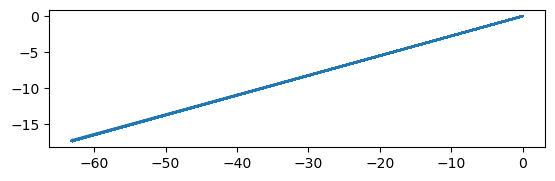

In [69]:
gdf_lines.plot()

In [70]:
# Función para dividir y limpiar las líneas
def dividir_y_limpiar_linea(linea):
    puntos = list(linea.coords)
    nuevas_lineas = []
    nueva_linea = []
    
    for punto in puntos:
        if punto != (0, 0):
            nueva_linea.append(punto)
        else:
            if nueva_linea:
                nuevas_lineas.append(LineString(nueva_linea))
                nueva_linea = []
    
    if nueva_linea:
        nuevas_lineas.append(LineString(nueva_linea))
    
    return nuevas_lineas

In [71]:
# Crear una lista para las nuevas líneas y nombres
nuevas_lineas = []
nuevos_nombres = []
for idx, row in gdf_lines.iterrows():
    lineas_divididas = dividir_y_limpiar_linea(row.geometry)
    for linea in lineas_divididas:
        nuevas_lineas.append(linea)
        nuevos_nombres.append(row['nombre'])

In [72]:
# Crear un nuevo GeoDataFrame con las nuevas líneas
gdf_lines = gpd.GeoDataFrame({'nombre': nuevos_nombres, 'geometry': nuevas_lineas}, crs="EPSG:4326")

In [73]:
# Función para contar la cantidad de coordenadas en una geometría de tipo LINESTRING
def contar_coordenadas(linea):
    return len(linea.coords)

In [74]:
gdf_lines['num_vert'] = gdf_lines['geometry'].apply(contar_coordenadas)

In [75]:
gdf_lines['vehiculo'] = vehiculo

In [76]:
gdf_lines

,nombre,geometry,num_vert,vehiculo
0,2024-09-16 20-48-38.tlog,"LINESTRING (-63.16515 -17.27737, -63.16512 -17...",790,DA02
1,2024-09-16 20-48-38.tlog,"LINESTRING (-63.17190 -17.27999, -63.17190 -17...",2248,DA02
2,2024-09-16 20-48-38.tlog,"LINESTRING (-63.16119 -17.28230, -63.16119 -17...",3122,DA02
3,2024-09-16 20-48-38.tlog,"LINESTRING (-63.16053 -17.27876, -63.16053 -17...",2178,DA02
4,2024-09-16 20-48-38.tlog,"LINESTRING (-63.14274 -17.26838, -63.14274 -17...",2015,DA02
5,2024-09-16 20-48-38.tlog,"LINESTRING (-63.14996 -17.27340, -63.14996 -17...",1904,DA02
6,2024-09-16 20-48-38.tlog,"LINESTRING (-63.15496 -17.26384, -63.15496 -17...",1095,DA02
7,2024-09-16 20-48-38.tlog,"LINESTRING (-63.15496 -17.26383, -63.15496 -17...",2800,DA02
8,2024-09-16 20-48-38.tlog,"LINESTRING (-63.16048 -17.28449, -63.16048 -17...",4304,DA02
9,2024-09-16 20-48-38.tlog,"LINESTRING (-63.09197 -17.28849, -63.09197 -17...",2354,DA02


<Axes: >

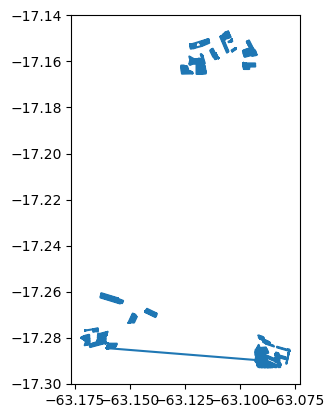

In [77]:
gdf_lines.plot()

In [78]:
gdf_lines.crs = "EPSG:4326"
gdf_lines_utm = gdf_lines.to_crs(epsg=32720)

<Axes: >

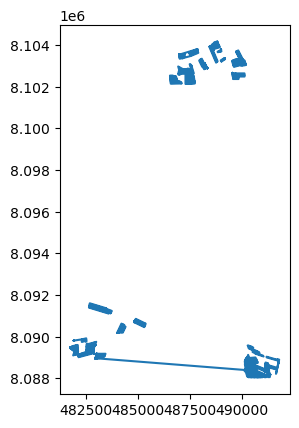

In [79]:
gdf_lines_utm.plot()

In [80]:
# Combinar los GeoDataFrames
gdf_combined = gpd.GeoDataFrame(pd.concat([gdf_rec, gdf_lines_utm], ignore_index=True))
# rellenar valores NaN
gdf_combined['idd'] = gdf_combined['idd'].fillna(0).astype(int)

In [81]:
gdf_combined

,idd,nombre,vehiculo,num_vert,id,asignado,geometry
0,0,Jul-20th-2024-08-43PM-Flight-Airdata.kml,DA03,807,1.0,si,"LINESTRING (460257.759 8096126.683, 460257.759..."
1,63,Jul-25th-2024-05-47PM-Flight-Airdata.kml,DA03,931,2.0,si,"LINESTRING (456011.255 8084542.548, 456011.265..."
2,63,Jul-25th-2024-06-51PM-Flight-Airdata.kml,DA03,1168,3.0,None,"LINESTRING (455648.848 8084842.307, 455648.848..."
3,63,Jul-25th-2024-07-06PM-Flight-Airdata.kml,DA03,1581,4.0,None,"LINESTRING (455647.763 8084843.024, 455647.752..."
4,0,Jul-25th-2024-10-42PM-Flight-Airdata.kml,DA03,1225,5.0,None,"LINESTRING (460855.506 8095707.381, 460855.527..."
...,...,...,...,...,...,...,...
977,0,2024-09-17 01-40-59.tlog,DA02,2905,NaN,NaN,"LINESTRING (487546.412 8102635.656, 487546.402..."
978,0,2024-09-17 02-04-48.tlog,DA02,2840,NaN,NaN,"LINESTRING (487551.707 8102638.812, 487551.664..."
979,0,2024-09-17 02-14-44.tlog,DA02,1056,NaN,NaN,"LINESTRING (487534.405 8102636.401, 487534.383..."
980,0,2024-09-17 02-53-22.tlog,DA02,2344,NaN,NaN,"LINESTRING (486877.958 8102265.582, 486879.318..."


In [82]:
gdf_combined.dtypes

idd            int32
nombre        object
vehiculo      object
num_vert       int64
id           float64
asignado      object
geometry    geometry
dtype: object

In [83]:
gdf_combined.to_file(path_rec, driver="ESRI Shapefile")